In [1]:
# Requirements
# python = 3.6.2
# pynwb = 1.0.1
# neo

In [2]:
#################################
# NWB Packages
#################################

import numpy
import pynwb
from pynwb import NWBFile, TimeSeries, get_manager
from pynwb.spec import NWBGroupSpec, NWBDatasetSpec, NWBNamespace
from pynwb.base import ProcessingModule
from pynwb.ecephys import ElectrodeGroup, Device
from pynwb.image import ImageSeries
from pynwb.core import set_parents
from pynwb import *
from datetime import datetime
from pynwb import NWBFile #, TimeSeries, get_manager

In [3]:
#################################
# neo Packages
#################################

import neo
from neo import *

print ("neo.__version__ = ", neo.__version__)
print(NWBIO.mode)

import urllib
import numpy as np
import quantities as pq
from matplotlib import pyplot
import matplotlib.pyplot as plt

neo.__version__ =  0.8.0.dev
one-file


In [4]:
#############
# NWB File
#############

#filename = "/home/elodie/NWB_Files/NWB_org/H19.29.141.11.21.01.nwb"
###filename = "/home/elodie/NWB_Files/NWB_File_python_3_pynwb_101_ephys_data.nwb"
filename = "/home/elodie/NWB_Files/NWB_File_python_3_pynwb_101_ephys_data_bis.nwb"

In [5]:
##################################
# Read NWB file from neoIO class
##################################

reader = neo.io.NWBIO(filename)
print("reader = ", reader)

reader =  <neo.io.nwbio.NWBIO object at 0x7fab65dd9c88>


In [6]:
bl = reader.read_block(lazy=False) # read() function is called read_block() in NWBIO class.

block in read_block =  <neo.core.block.Block object at 0x7fab644a9390>
   
*** def _handle_general_group ***
*** _handle_epochs_group ***
*** _handle_acquisition_group ***
*** _handle_stimulus_group ***
*** def _handle_processing_group ***
*** def _handle_analysis_group ***


In [7]:
# neo Block
print("bl = ", bl)

bl =  <neo.core.block.Block object at 0x7fab644a9390>


In [8]:
print("segment = ", segment)
print("   ")
print("bl.segments = ", bl.segments)

segment =  <module 'neo.core.segment' from '/home/elodie/env_NWB_py3/python-neo/neo/core/segment.py'>
   
bl.segments =  []


In [9]:
seg_nwb = reader._handle_epochs_group(False, 'name')

*** _handle_epochs_group ***


In [10]:
print("seg_nwb = ", seg_nwb)
print("   ")
print("reader._handle_epochs_group(True, bl)[0] = ", reader._handle_epochs_group(True, bl)[0])
print("   ")
print("reader._handle_epochs_group(True, bl) = ", reader._handle_epochs_group(True, bl))

seg_nwb =  (<neo.core.segment.Segment object at 0x7fabacb00f60>, <AnalogSignal(array([[0.95376875],
       [0.82932243],
       [0.31588623],
       [0.85261922],
       [0.62038077],
       [0.72666677],
       [0.89319377],
       [0.69435603],
       [0.1377899 ],
       [0.59501954]]) * V, [0.0 s, 0.5 s], sampling rate: 20.0 Hz)>, array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]))
   
*** _handle_epochs_group ***
reader._handle_epochs_group(True, bl)[0] =  <neo.core.segment.Segment object at 0x7fab64466f98>
   
*** _handle_epochs_group ***
reader._handle_epochs_group(True, bl) =  (<neo.core.segment.Segment object at 0x7fab641c9400>, <AnalogSignal(array([[0.95376875],
       [0.82932243],
       [0.31588623],
       [0.85261922],
       [0.62038077],
       [0.72666677],
       [0.89319377],
       [0.69435603],
       [0.1377899 ],
       [0.59501954]]) * V, [0.0 s, 0.5 s], sampling rate: 20.0 Hz)>, array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45

In [11]:
#for seg in bl.segments:
for seg in seg_nwb: 
    print("Ok")

Ok
Ok
Ok


In [12]:
type(seg)

numpy.ndarray

In [13]:
type(seg_nwb)

tuple

In [14]:
# Readable objects
NWBIO.supported_objects

[neo.core.block.Block,
 neo.core.segment.Segment,
 neo.core.analogsignal.AnalogSignal,
 neo.core.irregularlysampledsignal.IrregularlySampledSignal,
 neo.core.spiketrain.SpikeTrain,
 neo.core.epoch.Epoch,
 neo.core.event.Event]

In [15]:
nwb_seg = reader._handle_epochs_group(False, 'name')

*** _handle_epochs_group ***


In [16]:
print("nwb_seg = ", nwb_seg)

nwb_seg =  (<neo.core.segment.Segment object at 0x7fab641c96a0>, <AnalogSignal(array([[0.95376875],
       [0.82932243],
       [0.31588623],
       [0.85261922],
       [0.62038077],
       [0.72666677],
       [0.89319377],
       [0.69435603],
       [0.1377899 ],
       [0.59501954]]) * V, [0.0 s, 0.5 s], sampling rate: 20.0 Hz)>, array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]))


In [17]:
# From neo documentation

test_bl = Block()
print("test_bl = ", test_bl)
print("test_bl.segments = ", test_bl.segments)

test_bl =  <neo.core.block.Block object at 0x7fab641c9b00>
test_bl.segments =  []


In [18]:
seg = Segment()
print("seg = ", seg)
print("seg.analogsignals = ", seg.analogsignals)

seg =  <neo.core.segment.Segment object at 0x7fab641c9ef0>
seg.analogsignals =  []


In [19]:
print(reader._handle_epochs_group(True, block)[0])

*** _handle_epochs_group ***


In [20]:
# segment.analogsignal
reader._handle_epochs_group(True, block)[0].analogsignals

*** _handle_epochs_group ***


[AnalogSignal with 1 channels of length 10; units V; datatype float64 
 name: 'test_ephys_data'
 sampling rate: 20.0
 time: 0.0 to 0.5,
 AnalogSignal with 1 channels of length 10; units V; datatype float64 
 name: 'test_ephys_data'
 sampling rate: 20.0
 time: 0.0 to 0.5,
 AnalogSignal with 1 channels of length 10; units V; datatype float64 
 name: 'test_ephys_data'
 sampling rate: 20.0
 time: 0.0 to 0.5,
 AnalogSignal with 1 channels of length 10; units V; datatype float64 
 name: 'test_ephys_data'
 sampling rate: 20.0
 time: 0.0 to 0.5,
 AnalogSignal with 1 channels of length 10; units V; datatype float64 
 name: 'test_ephys_data'
 sampling rate: 20.0
 time: 0.0 to 0.5,
 AnalogSignal with 1 channels of length 10; units V; datatype float64 
 name: 'test_ephys_data'
 sampling rate: 20.0
 time: 0.0 to 0.5,
 AnalogSignal with 1 channels of length 10; units V; datatype float64 
 name: 'test_ephys_data'
 sampling rate: 20.0
 time: 0.0 to 0.5,
 AnalogSignal with 1 channels of length 10; unit

In [21]:
###########################
# plot a figure from neo
###########################

#data = segment
###data = reader._handle_timeseries(True, 1, 1)
data = reader._handle_epochs_group(False, '')[0] # segment.analogsignals
print("data = ", data)
data1 = reader._handle_epochs_group(False, '')[1] # segment.analogsignals
print("data1 = ", data1)

#print("data = ", data)
print("   ")
times = reader._handle_epochs_group(True, Block)[2]
print("   ")

*** _handle_epochs_group ***
data =  <neo.core.segment.Segment object at 0x7fab6416e400>
*** _handle_epochs_group ***
data1 =  [[0.95376875]
 [0.82932243]
 [0.31588623]
 [0.85261922]
 [0.62038077]
 [0.72666677]
 [0.89319377]
 [0.69435603]
 [0.1377899 ]
 [0.59501954]] V
   
*** _handle_epochs_group ***
   


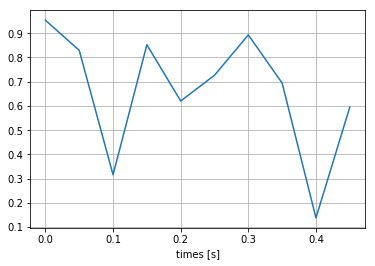

In [22]:
plt.plot(times, data1)
#plt.plot(times)
plt.xlabel('times [s]')
#plt.ylabel('[%s]' %container.get_acquisition(i).unit) 
#plt.title('%s: %s' %(container.get_acquisition(i).neurodata_type, i))
plt.grid(True)
plt.show()

data1 =  [[0.95376875]
 [0.82932243]
 [0.31588623]
 [0.85261922]
 [0.62038077]
 [0.72666677]
 [0.89319377]
 [0.69435603]
 [0.1377899 ]
 [0.59501954]] V
-----
i =  [0.95376875] V
i =  [0.82932243] V
i =  [0.31588623] V
i =  [0.85261922] V
i =  [0.62038077] V
i =  [0.72666677] V
i =  [0.89319377] V
i =  [0.69435603] V
i =  [0.1377899] V
i =  [0.59501954] V


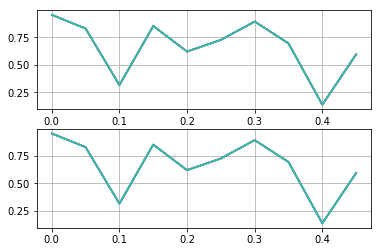

In [23]:
fig = plt.figure()
print("data1 = ", data1)
print("-----")
for i in data1:
    print("i = ", i)
    plt.subplot(2, 1, 1)    
    #plt.plot(times, data)
    plt.plot(times, data1[:])
    
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(times, data1)
    plt.grid(True)

In [24]:
# obj
ts = reader._handle_timeseries(True, 1, 1)
print("ts = ", ts)

ts =  [[0.95376875]
 [0.82932243]
 [0.31588623]
 [0.85261922]
 [0.62038077]
 [0.72666677]
 [0.89319377]
 [0.69435603]
 [0.1377899 ]
 [0.59501954]] V


In [25]:
#data0 = reader._handle_epochs_group(True, '')[0]
#
#plt.plot(times, data0)
#plt.xlabel('times [s]')
#plt.grid(True)
#plt.show()

In [26]:
test = reader._handle_timeseries(True, 1, 1)
print("test = ", test)

test =  [[0.95376875]
 [0.82932243]
 [0.31588623]
 [0.85261922]
 [0.62038077]
 [0.72666677]
 [0.89319377]
 [0.69435603]
 [0.1377899 ]
 [0.59501954]] V


In [27]:
irr = reader._handle_epochs_group(True, bl)[0].irregularlysampledsignals
print("irr = ", irr)

*** _handle_epochs_group ***
irr =  []


In [28]:
spiketrain = reader._handle_stimulus_group(True, bl)

*** _handle_stimulus_group ***
